# Model Development

In this section, several models has been developed that predicts the price of the car using the variables. 

### Questions:

* Do I know if the dealer is offering fair value for my trade-in?
* Do I know if I put a fair value on my car?

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result. 

### Setup

Import libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Linear Regression and Multiple Linear Regression

Linear Regression

__Simple Linear Regression__

this helps us to understand the relationship between two variables: 

* the predictor/independent variable(X)
* The response/dependent variable(Y)

the result of the linear regression is a __linear function__ that predicts the response(dependent variable) as a function of the predictor (independent) variable. 

$$ Y: Response Variable(X): Predictor Variable $$

__Linear Function__

$$ \hat{y} = a + bX $$

* a refers to the intercept of the regression line, the value of Y when X is 0.
* b refers to the slope of the regression line, the value with which Y changes when X increases by 1 unit

##### Load the modules for linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

##### Create the linear regression object

In [51]:
lm = LinearRegression()

##### Taking 'highway-mpg' as predictor to predict car price. 


In [52]:
X = df[['highway-mpg']]
Y = df['price']

##### Fit the linear model using highway-mpg


In [53]:
lm.fit(X,Y)

LinearRegression()

##### Output a prediction

In [54]:
yhat = lm.predict(X)
yhat[0:5]c 

SyntaxError: invalid syntax (3433241648.py, line 2)

##### Value of the intercept (a)

In [68]:
lm.intercept_

np.float64(38423.3058581574)

##### Value of the slope(b)

In [69]:
lm.coef_

array([-821.73337832])

##### Final estimated linear model: 

Putting the actual value we get from above: 

$$price = 38423.31 - 821.73 * highway-mpg$$

#### Taking 'engine-size' as the predictor

In [70]:
# Create a linear regression object called lm1
lm1 = LinearRegression()
lm1


LinearRegression()

In [71]:
# Choose the features: 
X = df[['engine-size']]
Y = df['price']

In [72]:
# train the model
lm1.fit(X, Y)
lm1

LinearRegression()

In [73]:
# output a prediction

yhat1 = lm1.predict(X)
yhat1[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [74]:
# Find the slope and intercept of the model
# intercept
print(lm1.intercept_)

#slope
print(lm1.coef_)

-7963.338906281042
[166.86001569]


### Estimated Linear model: 

$$ price = -7963.34 + 166.86 * df['engine-size']$$

In [75]:
yhat1 = -7963.34 + 166.86 * X
print(yhat1)
Price = -7963.34 + 166.86 * df['engine-size']
print(Price)

     engine-size
0       13728.46
1       13728.46
2       17399.38
3       10224.40
4       14729.62
..           ...
196     15563.92
197     15563.92
198     20903.44
199     16231.36
200     15563.92

[201 rows x 1 columns]
0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64


__Multiple Linear Regression__

* predict car price using more than one variable

* Most of the real-world regression models involve multiple predictors.

$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$


$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$


The equation is: 

$$ \hat{y} = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4$$

From the previous EDA, we already know that other good predictions of price could be: 


<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>


In [47]:
Z = df[['horsepower', 'curb-weight', 'engine-size','highway-mpg']]

In [77]:
# fit the linear model using the four above variables

lm.fit(Z, df['price'])

LinearRegression()

In [78]:
# value of intercept

lm.intercept_

np.float64(-15806.62462632922)

In [79]:
# value of slope
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [80]:
# final estimated linear model is: 

price = -15806.62 + 53.49574423 * df['horsepower'] + 4.70770099 * df['curb-weight'] + 81.53026382 * df['engine-size'] + 36.05748882 * df['highway-mpg']
price

0      13699.116227
1      13699.116227
2      19051.659316
3      10620.366546
4      15521.318816
           ...     
196    16694.405050
197    19503.683814
198    20475.462992
199    17804.043425
200    17104.079693
Length: 201, dtype: float64

### Final estimated linear model is: 

price = -15806.62 + 53.49574423 * horsepower + 4.70770099 * curb-weight + 81.53026382 * engine-size + 36.05748882 * highway-mpg

#### let's take the predictor varaibles 'normaliszed-losses' and 'highway-mpg'

In [81]:
K_2 = df[['normalized-losses','highway-mpg']]
X = df['price']

In [82]:
#fit the linear model

lm1 = LinearRegression()
lm1.fit(K_2, X)

LinearRegression()

In [83]:
# slope

lm1.coef_

array([   1.49789586, -820.45434016])

In [84]:
# intercept
lm1.intercept_

np.float64(38201.31327245728)

In [85]:
# the model is: 

print("price =, 38201.31 + 1.49789586 , * normalised-losses  -820.45434016 * highway-mpg")

price =, 38201.31 + 1.49789586 , * normalised-losses  -820.45434016 * highway-mpg


In [86]:
print("price =", lm1.intercept_, "+" , lm1.coef_[0], "* normalised-losses", lm1.coef_[1], "highway-mpg")

price = 38201.31327245728 + 1.4978958634133213 * normalised-losses -820.4543401631865 highway-mpg


## Model Evaluation for Linear model
### 1. Using Visualisation

We have develop some models, now how do we evaluate models and choose the best one? 

One way to do this is by using a visualization

In [87]:
import seaborn as sns
%matplotlib inline

a. Regression plot

For simple linear regression, an excellent way to visualize the fit of our model is by using __regression plots__. 

* show a combination of a scattered data points (a scatterplot), with the fitted linear regression line going through the data. 
* give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).


#####  visualize highway-mpg as potential predictor variable of price:


(0.0, 48166.81454952638)

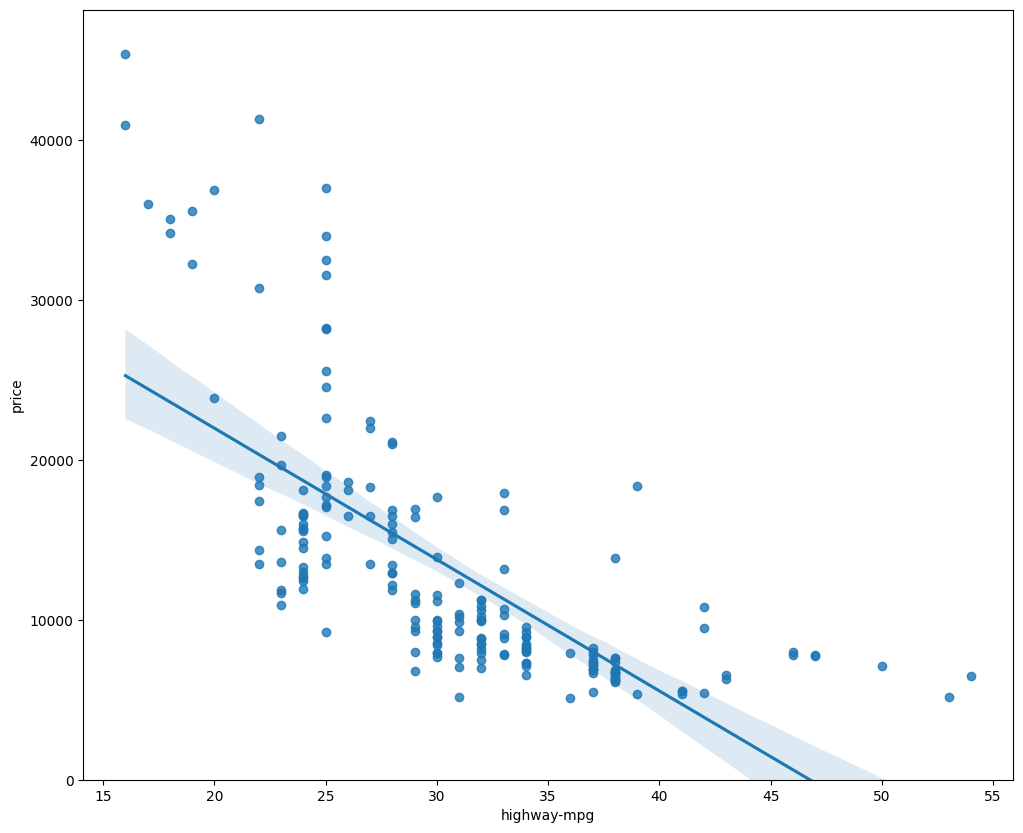

In [88]:
plt.figure(figsize=(12, 10))
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)

Insigths: 

*  The price is negatively correlated to highway-mpg since the regression slope is negative.

__Note:__ 

i. Keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. 

ii. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.



#### Compare this plot to the regression plot of 'peak-rpm'

(0.0, 47414.1)

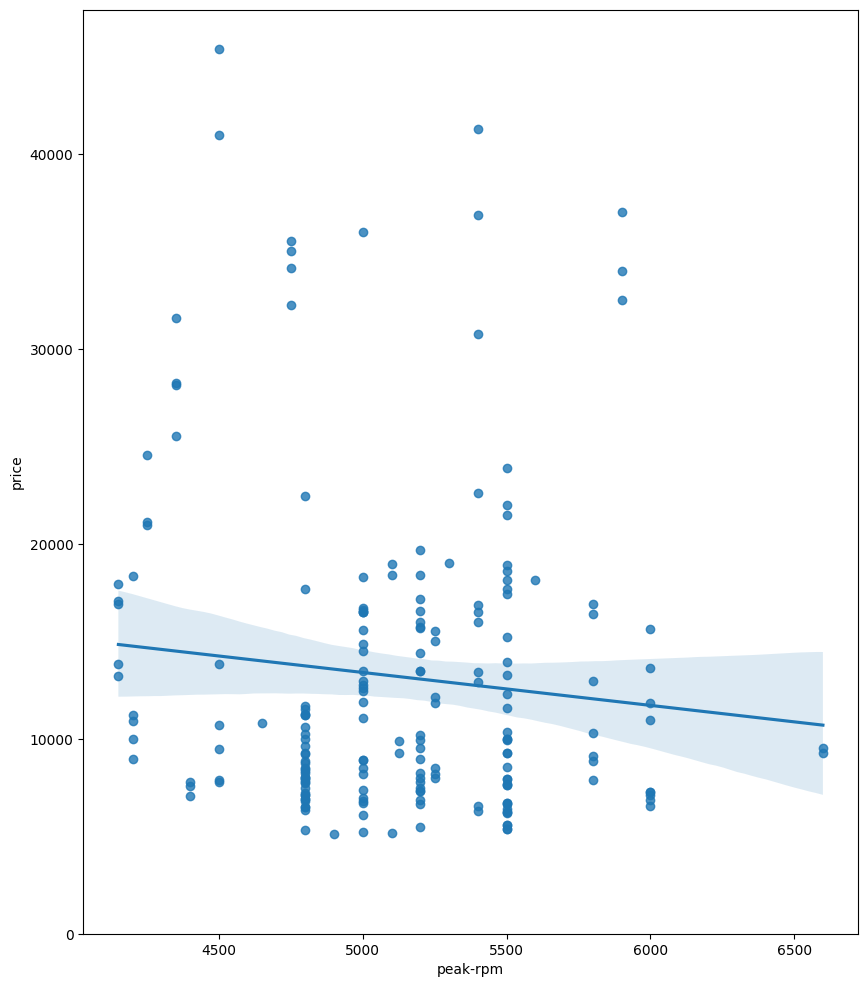

In [89]:
plt.figure(figsize=(10, 12))
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
plt.ylim(0,)

The scores for "highway-mpg" are significantly closer to the produced line and, on average, fall. The "peak-rpm" points are more dispersed around the expected line, making it more difficult to see if they are rising or falling with an increase in "peak-rpm."


##### Given the regression plots above, to know which are more strongly corrleated between'peak-rpm' or 'highway-mpg' with 'price'. We use corr() method. 

In [90]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.




### 2. Using Residual plot

* A good way to visualize the variance of the data is to use a residual plot
* __residual__: The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line
* __residual plot graph__: A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.
* __pay attention__:  the spread of the residuals: 

    -  If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. 
    - reason: Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.


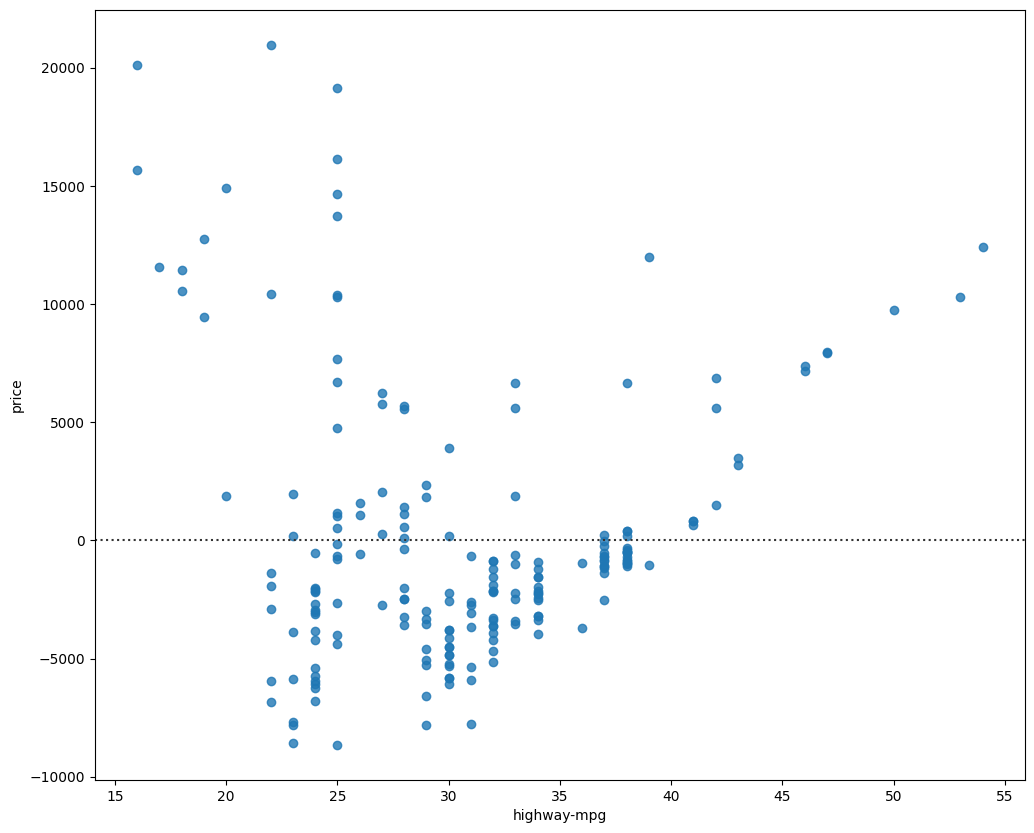

In [91]:
plt.figure(figsize=(12, 10))
sns.residplot(x = df['highway-mpg'], y = df['price'])
plt.show()

Since the residuals are not dispersed randomly along the x-axis, we might be better off using a non-linear model to explain the data.

## Model Evaluation for Multiple Linear Regression

For multiple Linear Regression, we can't visulize with regression or residual plot. 

So, one way of looking at the fit of the model is by looking at the __distribution plot__. 

Look the distribution of the fittted values that results from the model and compare it to the distribution of the actual values. 

#### In order to get the fitted values, we need a prediction. 

In [92]:
Y_hat = lm.predict(Z)


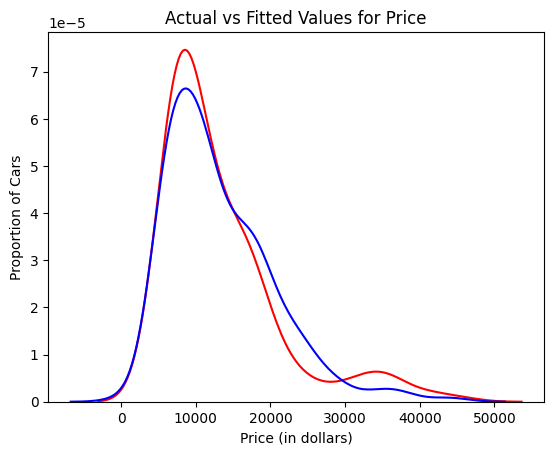

In [101]:

ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value", fill=False)
sns.kdeplot(Y_hat, color="b", label="Fitted Values", fill=False, ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


It seems that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. 

There is, however, some improvments can be done. 

# 3. Polynomial Regression and Pipelines

* is a general linear regression model or multiple linear regression models. 

* by squaring or setting higher-order terms of the predictor variables, general linear regression can be get. 

* Different orders of polynomial regression: 

    <center><b>Quadratic - 2nd Order</b></center>
$$
\hat{Y} = a + b_1 X +b_2 X^2 
$$




<center><b>Cubic - 3rd Order</b></center>

$$
\hat{Y} = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\
$$




<center><b>Higher-Order</b>:</center>

$$
\hat{Y}= a + b_1 X +b_2 X^2 +b_3 X^3 ....\\
$$






As from the previous linear model, it did not provide the best fit while using 'highway-mpg' as the predictor variable. 

So, if we can try fitting a polynomial model to the data. 

##### Getting the variables for this:

In [13]:
x = df['highway-mpg']
y = df['price']

Fit the poloynomial using the function __polyfit__, we can use the function __ploy1d__ to display the polynomial function

In [14]:
f = np.polyfit(x, y, 3)  # 3 because we are using 3rd order polynomial
p = np.poly1d(f)
print(p)


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


##### Plot the function

In [25]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)


    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')


    plt.show()
    plt.close()


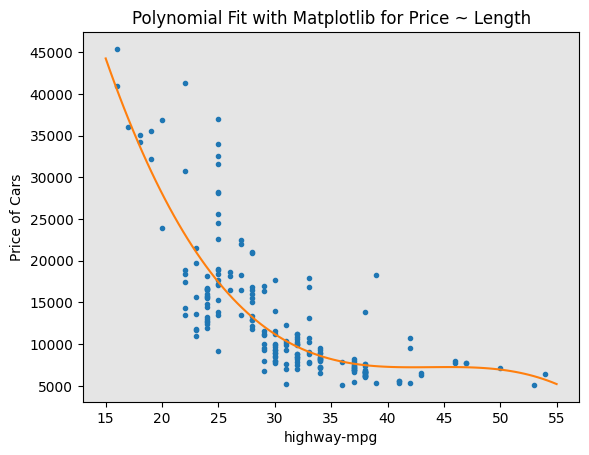

In [26]:
PlotPolly(p, x, y, 'highway-mpg')

In [27]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

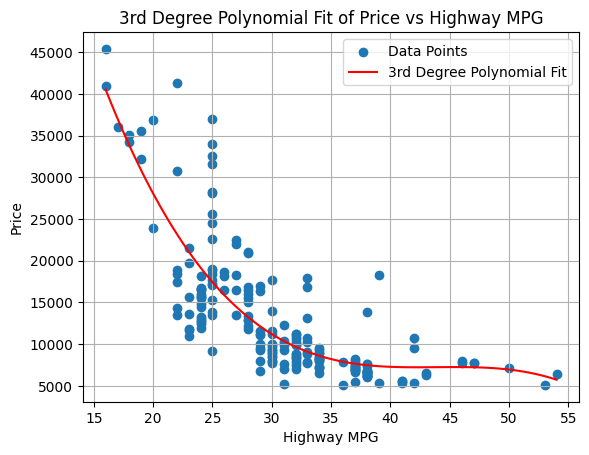

In [33]:
# Fit a 3rd degree polynomial to the data
coefficients = np.polyfit(x, y, 3)
polynomial = np.poly1d(coefficients)

# Generate x values for plotting
x_vals = np.linspace(min(x), max(x), 100)
y_vals = polynomial(x_vals)

# Plotting the data points and the polynomial fit
plt.scatter(x, y, label='Data Points')
plt.plot(x_vals, y_vals, color='red', label='3rd Degree Polynomial Fit')
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.title('3rd Degree Polynomial Fit of Price vs Highway MPG')
plt.legend()
plt.grid(True)
plt.show()


From this plot, this ploynomial model performs better than the linear model. This is because the generated polynomial function 'hits' more of the data points. 

Linear Regression (from your image):

Linear Trend: The line in your image shows a straight-line fit. This is the simplest form of regression where we assume that the relationship between price and MPG is purely linear. While this can sometimes work well, it may not capture complex patterns or variations in the data that a polynomial model can.


Better Fit for Variations: The polynomial model (the curve) does a better job than a straight line at following the ups and downs in the data. It can bend and adjust to fit changes in the pattern, like when the price drops faster or slower at different points. While it might not fit every point perfectly, it usually matches the data better than a straight line. But if we use a curve that is too complicated, it might start fitting the random noise instead of the real trend, which is something to avoid.

Why the Polynomial Fit Could Be Better:

Non-linearity: The relationship between MPG and price might not be linear. As vehicles become more fuel-efficient, the price may decrease at a different rate than what a straight line suggests.

More Accurate Representation: The polynomial fit is more flexible, so it better represents data that doesn't strictly follow a straight path.
Lower Residuals: With a polynomial model, the residuals (differences between actual points and the predicted line) could be smaller, indicating a closer fit.

When to Use Polynomial Models:

When you observe that a linear model does not capture the true trends in your data.
When the relationship between variables is complex and cannot be captured well by a straight line.

#### Creating 11 order polynomial model with the variable x and y

In [28]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


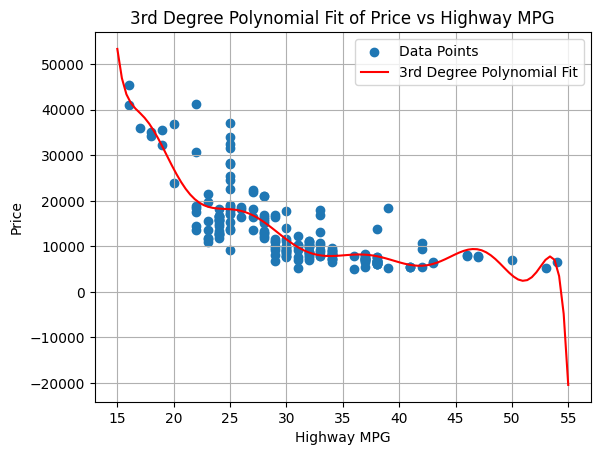

In [31]:
# Fit a 11 degree polynomial to the data
coefficients = np.polyfit(x, y, 11)
polynomial = np.poly1d(coefficients)

# Generate x values for plotting
x_vals = np.linspace(15, 55, 100)
y_vals = polynomial(x_vals)

# Plotting the data points and the polynomial fit
plt.scatter(x, y, label='Data Points')
plt.plot(x_vals, y_vals, color='red', label='3rd Degree Polynomial Fit')
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.title('3rd Degree Polynomial Fit of Price vs Highway MPG')
plt.legend()
plt.grid(True)
plt.show()


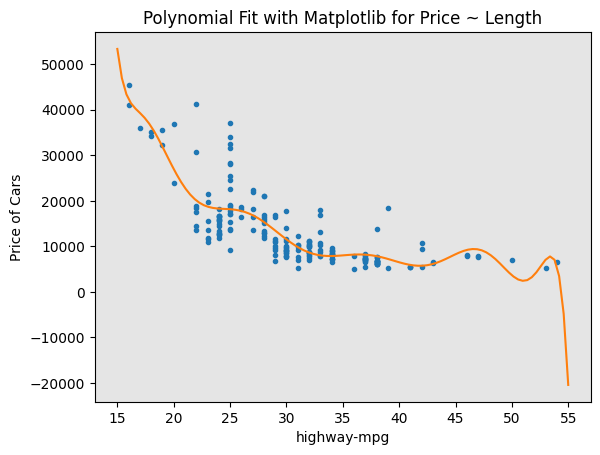

In [30]:
PlotPolly(p1, x, y, 'highway-mpg')

Why the 11th-order Polynomial Fits So Closely:

High Flexibility: 

The 11th-order polynomial can bend a lot, which helps it follow the data points very closely. It tries to fit every twist and turn in the data.
Overfitting Risk: While the curve looks like it fits almost all the data points perfectly, it may also be capturing random fluctuations or noise in the data that aren't part of the true trend. This is called overfitting, where the model is too complex and doesn't generalize well to new data.

Key Points:

The curve fits the data points extremely well, but it might not perform as well if you use it to predict prices for new cars (data not in this set).
Higher-degree polynomials can be useful, but going too high (like 11th-order) might make the model more sensitive to small changes in the data that don't really matter.

## Polynomial regression with more than one dimension: Multivariate Polynomial Regression

Polynomial regression can be extended to work with **multiple dimensions (features)**, not just a single variable like highway MPG. When we have more than one input feature (e.g., highway MPG, engine size, weight, etc.), it becomes **multivariate polynomial regression**.

### How Polynomial Regression Works with Multiple Dimensions:
1. **Input Features**: In multiple dimensions, your inputs could be, for example:
   - $ x_1 $: highway MPG
   - $ x_2 $: engine size
   - $x_3$: weight of the car

2. **Polynomial Terms**: For each input, you can generate polynomial terms. For a second-degree polynomial with two features $ x_1 $ and $ x_2 $, the regression equation might look like this:

   $$
   y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_1 x_2 + \beta_5 x_2^2
   $$
   

   This equation includes:
   - Linear terms $ x_1 , x_2 $.
   - Squared terms $x_1^2, x_2^2$.
   - Interaction terms $x_1 x_2$, which capture relationships between the variables.

3. **Higher-Degree Polynomials**: If We increase the degree, we'll get even more terms, such as $x_1^3, x_1^2 x_2$, etc. This allows the model to capture more complex relationships between the variables.









For example, the expression for a second-order (degree=2) polynomial with two variables is given by: 



$$
\hat{Y} = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


In [43]:
#import the module
from sklearn.preprocessing import PolynomialFeatures

Creating a PolynomialFeatures object of degree 2

In [36]:
poly = PolynomialFeatures(degree=2)
poly

PolynomialFeatures()

In [56]:
X_poly = poly.fit_transform(Z)


In [57]:
Z.shape

(201, 4)

In the original data, there are 201 samples with 4 features. 

In [58]:
X_poly.shape

(201, 15)

After the transformation, there are 201 samples and 15 features. 

In [60]:
# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict and evaluate the model
y_pred = model.predict(X_poly)

### Pipeline

A pipeline in simple language is like an assembly line in a factory. It helps you organize and automate a series of steps in a machine learning project, making sure each step is done in the correct order.

How a Pipeline Works:

Think of each step in a pipeline as a task. These tasks can include:

Preprocessing the data (like scaling or transforming it).

Creating new features (like polynomial features).

Training a model (like linear regression, decision trees, etc.).

The pipeline will run each of these tasks one after the other, making sure the data flows through them smoothly. This ensures that every time you run your model, the same steps are followed, reducing errors and saving time.

Why Use a Pipeline?

Consistency: Every time you use the pipeline, it will apply the same steps in the same order, so you won’t forget a step.

Reusability: Once you create a pipeline, you can easily reuse it with different datasets.

Simplicity: It keeps your code clean and organized.

We use the module __pipeline__ to create a pipeline. and also __StandardScaler__. 

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Create a pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructer. 

In [ ]:
# Create a pipeline with scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the data
    ('model', LinearRegression())  # Step 2: Fit the model
])


In [63]:
input_pass = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

passing the above input_pass which is list as an argument to the pipeline constructor

In [65]:
pipeline = Pipeline(input_pass)

What happen in the above code is: 

First, data type Z is converted to type float to avoid conversion warngings that may appear as a result of StandardScaler taking float inputs. 

Second, we normalize the data, perform a transform and fit the model simultaneously. 

In [66]:
Z = Z.astype(float)
pipeline.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [67]:
ypipe = pipeline.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])